In [1]:
from utils.CaImageCSV import CaImageCSV

In [2]:
csv = CaImageCSV('./resources/ID181106CreI_Longitudinal_Traces.csv')

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [3]:
context_data = csv.filtered_by_context('B1')
context_data

C000  C001      C002      C003       C004  C005  \
1   2                                                                  
B1  180126.884  16.264410   NaN  60.30215  183.6376   91.21388   NaN   
NaN 180126.984  14.499600   NaN  54.83386  199.5037   83.35922   NaN   
    180127.084  12.925470   NaN  49.86143  249.3989   93.76958   NaN   
    180127.184  11.521430   NaN  45.33990  231.7731  113.44720   NaN   
    180127.284  14.967490   NaN  41.22839  215.3912  103.76160   NaN   
...                   ...   ...       ...       ...        ...   ...   
    180435.784  12.901920   NaN  31.19081  147.6740   86.51265   NaN   
    180435.884  11.500420   NaN  28.36233  142.2585   99.14130   NaN   
    180435.984  10.250350   NaN  39.82058  197.5105   90.63380   NaN   
    180436.084   9.135347   NaN  36.20955  183.5467   82.82690   NaN   
B1  180436.184  18.401010   NaN  32.92597  170.5684   75.66292   NaN   

                    C006       C007       C008  C009  ...  C568  C569  C570  \
1   2                                                 ...                     
B1  180126.884  150.6788  153.38300  127.15800   NaN  ...   NaN   NaN   NaN   
NaN 180126.984  140.0025  172.65680  122.67860   NaN  ...   NaN   NaN   NaN   
    180127.084  130.0800  157.05490  135.69500   NaN  ...   NaN   NaN   NaN   
    180127.184  120.8579  142.83570  125.80200   NaN  ...   NaN   NaN   NaN   
    180127.284  112.2868  129.87650  119.11200   NaN  ...   NaN   NaN   NaN   
...                  ...        ...        ...   ...  ...   ...   ...   ...   
    180435.784  166.5971   50.15569   44.14518   NaN  ...   NaN   NaN   NaN   
    180435.884  154.7971   45.40926   49.69436   NaN  ...   NaN   NaN   NaN   
    180435.984  143.8302   41.08344   53.07134   NaN  ...   NaN   NaN   NaN   
    180436.084  133.6374   73.83784   83.59167   NaN  ...   NaN   NaN   NaN   
B1  180436.184  124.1642   66.99282   73.44692   NaN  ...   NaN   NaN   NaN   

                C572  C573  C574  C575  C576  C577  C578  
1   2                                                     
B1  180126.884   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
NaN 180126.984   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180127.084   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180127.184   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180127.284   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...              ...   ...   ...   ...   ...   ...   ...  
    180435.784   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180435.884   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180435.984   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
    180436.084   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
B1  180436.184   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[3094 rows x 546 columns]

In [4]:
# items = CaImageCSV.optimize_std(context_data)
# items

In [5]:
from matplotlib import pyplot as plt
from oasis.functions import deconvolve
from oasis.plotting import simpleaxis

/app/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [9]:
numpyed_items = csv.optimize_std_by_series(context_data['C000'].fillna(0.0)).to_numpy()
print(numpyed_items[-10:-1])
context_data['C000'].astype(float).fillna(0.0).std(skipna=False)

[3.12215176 2.78379184 2.48199024 2.21279833 1.97269142 1.7585278
 1.56750377 1.39711961 1.24514504]


7.336773416871316

In [10]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(None, None), penalty=1)

CPU times: user 480 ms, sys: 749 µs, total: 481 ms
Wall time: 115 ms


In [11]:
times = len(s) /10.0
count = len(s[s > 0.0])
count / times

2.6567550096961865

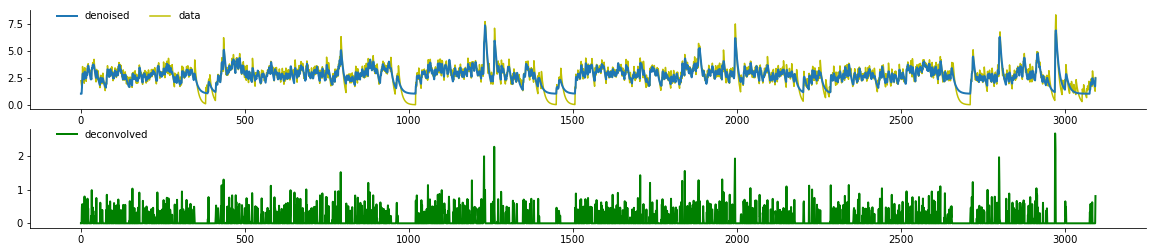

In [12]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
# plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()

In [15]:
numpyed_items = csv.optimize_std_by_series(context_data['C002'].fillna(0.0)).to_numpy()
print(numpyed_items[-10:-1])
context_data['C002'].astype(float).fillna(0.0).std(skipna=False)

[0.60803748 0.5528996  0.50276135 0.45716982 0.41571246 0.3780143
 0.34373478 0.48260204 0.43883848]


82.51224949714786

In [16]:
%time c, s, b, g, lam = deconvolve(numpyed_items, g=(None,None), penalty=1)

CPU times: user 27.3 ms, sys: 0 ns, total: 27.3 ms
Wall time: 9.16 ms


In [17]:
times = len(s) /10.0
count = len(s[s > 0.0])
count / times

0.03878474466709761

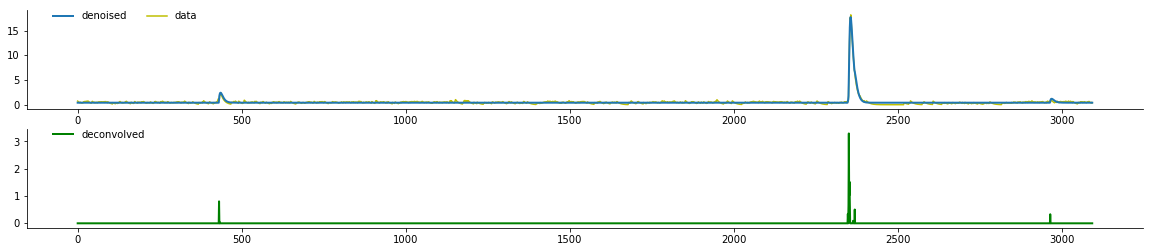

In [18]:
plt.figure(figsize=(20, 4))
plt.subplot(211)
plt.plot(b + c, lw=2, label='denoised')
plt.plot(numpyed_items, label='data', zorder=-12, c='y')
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.subplot(212)
plt.plot(s, lw=2, label='deconvolved', c='g')
# plt.ylim(0, 5.0)
plt.legend(ncol=3, frameon=False, loc=(.02, .85))
simpleaxis(plt.gca())
plt.show()